In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
with_resource = pd.read_csv('30FoldCV_30k/metrics_summary.csv')
with_resource['experiment'] = 'With device_ip, device_id, device_model'

without_resource = pd.read_csv('30FoldCV_30k_no_device_ip_id_model/metrics_summary.csv')
without_resource['experiment'] = 'Without device_ip, device_id, device_model'

In [3]:
plot_data = pd.concat([with_resource, without_resource])
model_map = {'LGBM' : 'LGBM', 'CATBOOST' : 'CatBoost', 'Ours' : 'Ours', 'Vanilla_GBM' : 'Vanilla GBM', 'SKLEARN_MI' : 'Scikit-Learn Mean Imputing','XGBOOST_MI' : 'XGBoost Mean Imputing'}
plot_data['model'] = plot_data['model'].map(model_map)

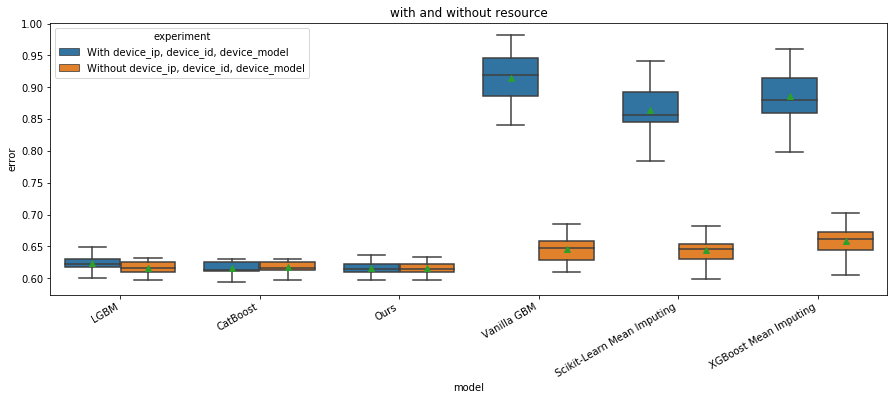

In [4]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(x = 'model', y = 'error', hue = 'experiment', data = plot_data, showmeans=True)
ax.set_title('with and without resource')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

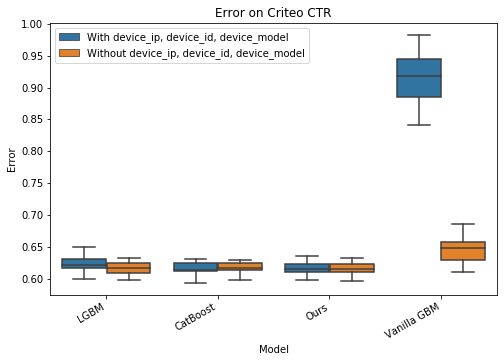

In [5]:
plt.figure(figsize=(8,5))
temp_plot_data = plot_data[plot_data['model'].isin(['LGBM', 'Vanilla GBM', 'CatBoost', 'Ours'])]
ax = sns.boxplot(x = 'model', y = 'error', hue = 'experiment', data = temp_plot_data, flierprops = dict(markerfacecolor = '0.50', markersize = 1))
ax.set_title('Error on Criteo CTR')
ax.set_xlabel('Model')
ax.set_ylabel('Error')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)
ax.get_figure().savefig(f"Error on Criteo_with_without.png")
plt.show()

In [6]:
plot_data.head()

,error,nleaves,ntrees,model,experiment
0,0.649558,795.0,100.0,LGBM,"With device_ip, device_id, device_model"
1,0.599980,789.0,100.0,LGBM,"With device_ip, device_id, device_model"
2,0.625323,791.0,100.0,LGBM,"With device_ip, device_id, device_model"
3,0.613803,790.0,100.0,LGBM,"With device_ip, device_id, device_model"
4,0.610726,792.0,100.0,LGBM,"With device_ip, device_id, device_model"


In [7]:
plot_data.groupby(['model','experiment'])['error'].mean()

model                       experiment                                
CatBoost                    With device_ip, device_id, device_model       0.615653
                            Without device_ip, device_id, device_model    0.617256
LGBM                        With device_ip, device_id, device_model       0.624064
                            Without device_ip, device_id, device_model    0.616656
Ours                        With device_ip, device_id, device_model       0.616130
                            Without device_ip, device_id, device_model    0.615972
Scikit-Learn Mean Imputing  With device_ip, device_id, device_model       0.864237
                            Without device_ip, device_id, device_model    0.644527
Vanilla GBM                 With device_ip, device_id, device_model       0.915032
                            Without device_ip, device_id, device_model    0.645631
XGBoost Mean Imputing       With device_ip, device_id, device_model       0.885924
                

In [8]:
from scipy.stats import ttest_ind

def perform_one_sided_test(a , b, significance_level = 0.05):
    # h_0: a < b
    print(F"Variance of the samples: {np.round(np.std(a),5)} {np.round(np.std(b),5)}")
    t, two_sided_p_value = ttest_ind(a, b,equal_var = False)
    print(F"two sided p value: {two_sided_p_value}")
    one_sided_p_value = two_sided_p_value/2
    if t > 0 and one_sided_p_value < significance_level:
        result = 'H_1'
    else:
        result = 'H_0'
    print(F"t is {np.round(t,2)}")
    print(F"mean: m_0: {np.round(np.mean(a),5)}, mean: m_1: {np.round(np.mean(b),5)}")
    print(F"{result}, p_value: {np.round(one_sided_p_value,3)}")

In [9]:
for model in plot_data.model.unique():
    with_ = plot_data[(plot_data.model == model) & (plot_data.experiment == 'with_resource')]['error'].tolist()
    without_ = plot_data[(plot_data.model == model) & (plot_data.experiment == 'without_resource')]['error'].tolist()
    print(f'MODEL: {model}')
    print('#'*50)
    perform_one_sided_test(with_ , without_)

MODEL: LGBM
##################################################
Variance of the samples: nan nan
two sided p value: nan
t is nan
mean: m_0: nan, mean: m_1: nan
H_0, p_value: nan
MODEL: CatBoost
##################################################
Variance of the samples: nan nan
two sided p value: nan
t is nan
mean: m_0: nan, mean: m_1: nan
H_0, p_value: nan
MODEL: Ours
##################################################
Variance of the samples: nan nan
two sided p value: nan
t is nan
mean: m_0: nan, mean: m_1: nan
H_0, p_value: nan
MODEL: Vanilla GBM
##################################################
Variance of the samples: nan nan
two sided p value: nan
t is nan
mean: m_0: nan, mean: m_1: nan
H_0, p_value: nan
MODEL: Scikit-Learn Mean Imputing
##################################################
Variance of the samples: nan nan
two sided p value: nan
t is nan
mean: m_0: nan, mean: m_1: nan
H_0, p_value: nan
MODEL: XGBoost Mean Imputing
##################################################
Va

C:\Users\afeki\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\afeki\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\afeki\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\afeki\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\afeki\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
